In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
train = pd.read_csv('../dataset/processed/train.csv',parse_dates=['Date'], index_col='Date')


In [3]:
train = train.drop(columns=["Commodity", "Item"])
train.head()

,Price
Date,
2013-06-16,37.5
2013-06-16,29.0
2013-06-16,20.5
2013-06-16,15.5
2013-06-16,29.0


In [4]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

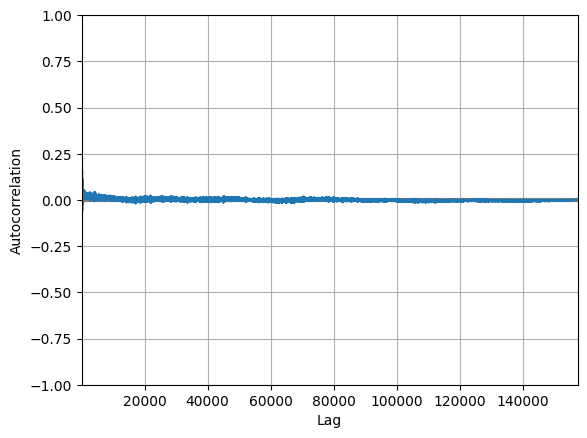

In [5]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(train['Price'])
plt.show()

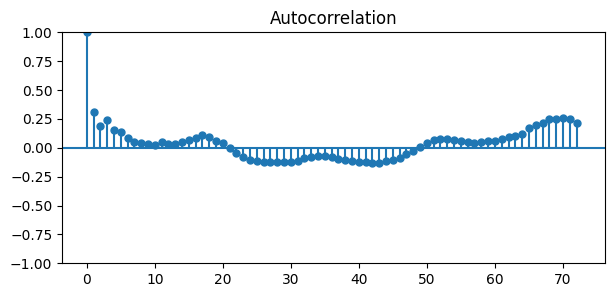

In [6]:
# Autocorrelation plot
fig, ax = plt.subplots(figsize=(7, 3))
plot_acf(train['Price'], ax=ax, lags=72)
plt.show()

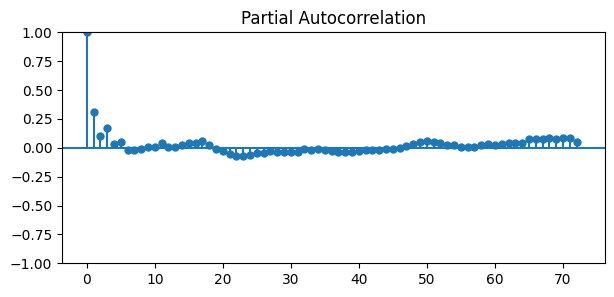

In [7]:
# Partial autocorrelation plot
fig, ax = plt.subplots(figsize=(7, 3))
plot_pacf(train['Price'], ax=ax, lags=72, method='ywm')
plt.show()

In [8]:

train['rolmean'] = train['Price'].rolling(window=12).mean()
train['rolstd'] = train['Price'].rolling(window=12).std()

In [9]:
train

,Price,rolmean,rolstd
Date,,,
2013-06-16,37.5,NaN,NaN
2013-06-16,29.0,NaN,NaN
2013-06-16,20.5,NaN,NaN
2013-06-16,15.5,NaN,NaN
2013-06-16,29.0,NaN,NaN
...,...,...,...
2019-12-31,215.0,137.291667,98.468144
2019-12-31,287.5,149.166667,107.647010
2019-12-31,222.5,158.125000,109.009617


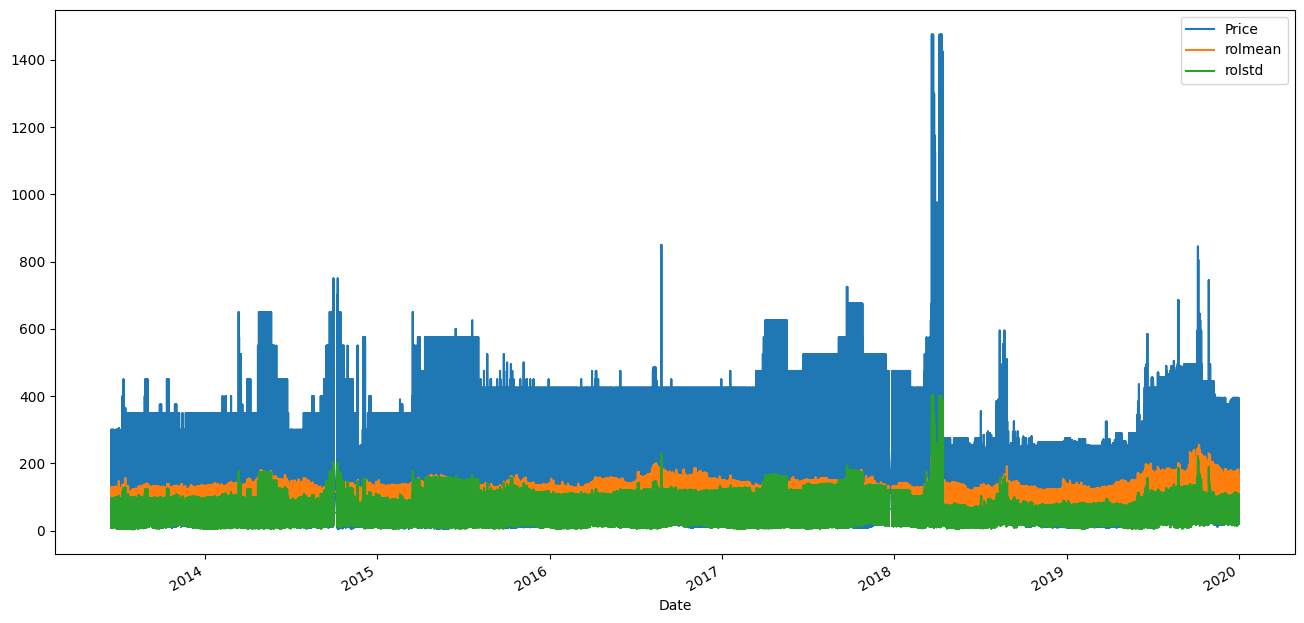

In [10]:
import matplotlib.pyplot as plt
plt.style.use('default')

%matplotlib inline
  
plt.show(block=False)

train[['Price', 'rolmean', 'rolstd']].plot(
  label='Price', figsize=(16, 8))

plt.show()

KPPS Test

In [11]:

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

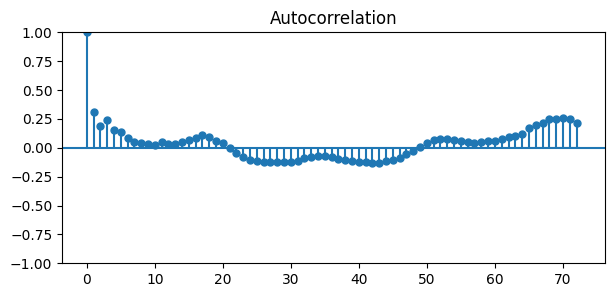

In [12]:
# Autocorrelation plot
fig, ax = plt.subplots(figsize=(7, 3))
plot_acf(train['Price'], ax=ax, lags=72)
plt.show()

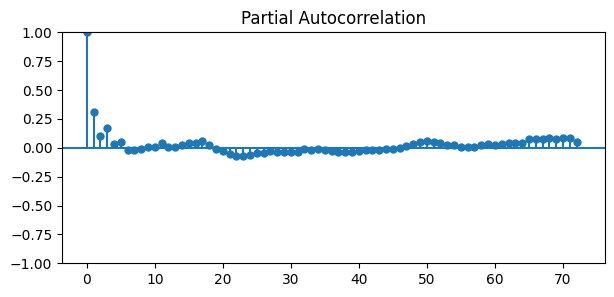

In [13]:
# Partial Autocorrelation plot
fig, ax = plt.subplots(figsize=(7, 3))
plot_pacf(train['Price'], ax=ax, lags=72, method='ywm')
plt.show()

In [14]:
from statsmodels.tsa.stattools import kpss

In [15]:

stats, p, lags, critical_values = kpss(train['Price'], 'ct')

C:\Users\User\AppData\Local\Temp\ipykernel_9144\2430263764.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stats, p, lags, critical_values = kpss(train['Price'], 'ct')


In [16]:
print(f'KPSS Statistic: {stats}')
print(f'p-value: {p}')
print(f'num lags: {lags}')
print(f'Critial Values: {critical_values}')

KPSS Statistic: 3.195092866926831
p-value: 0.01
num lags: 127
Critial Values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


In [17]:

if p < 0.05:
  print('Series is not stationary')
else:
  print('Series is stationary')

Series is not stationary


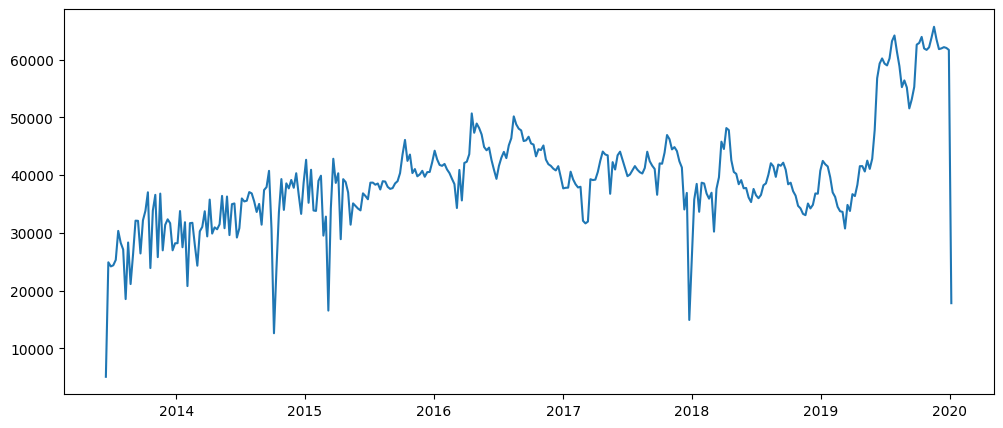

In [18]:

plt.figure(figsize=(12,5))
plt.plot(train['Price'].resample('W').sum(),label="Price")
plt.show()

Differencing

In [19]:
train['Price1'] = train['Price'] - train['Price'].shift(1)

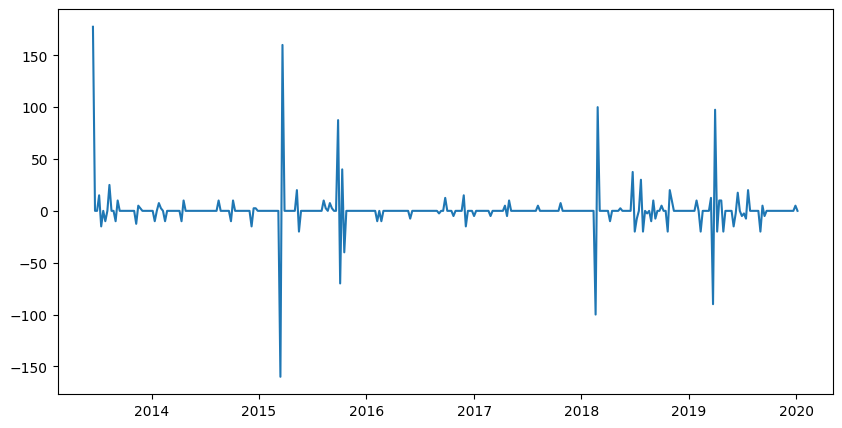

In [20]:
plt.figure(figsize=(10,5))
plt.plot(train['Price1'].resample('W').sum(),label="Price")
plt.show()

<Axes: xlabel='Date'>

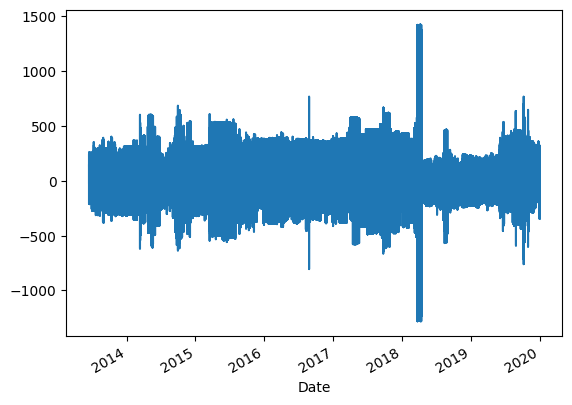

In [21]:
train['price_diff_12'] = train['Price'] - train['Price'].shift(12)

train['price_diff_12'].plot()

In [22]:
train['price_diff_12'].isnull()

Date
2013-06-16     True
2013-06-16     True
2013-06-16     True
2013-06-16     True
2013-06-16     True
              ...  
2019-12-31    False
2019-12-31    False
2019-12-31    False
2019-12-31    False
2019-12-31    False
Name: price_diff_12, Length: 157439, dtype: bool

In [23]:
train['price_diff_12'].dropna()

Date
2013-06-16    -15.0
2013-06-16     28.5
2013-06-16      7.0
2013-06-16     49.5
2013-06-16    -14.0
              ...  
2019-12-31    150.0
2019-12-31    142.5
2019-12-31    107.5
2019-12-31    157.5
2019-12-31    127.5
Name: price_diff_12, Length: 157427, dtype: float64

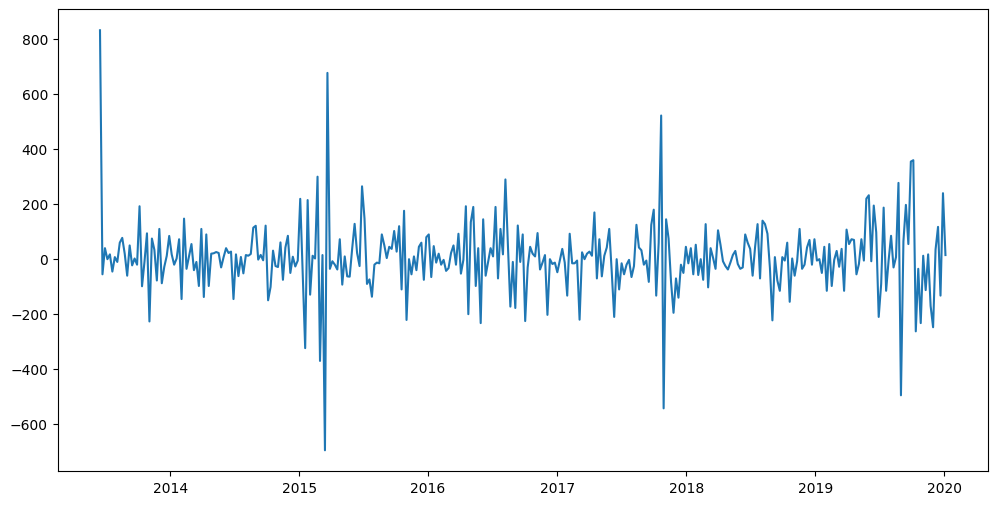

In [24]:
plt.figure(figsize=(12,6))
plt.plot(train['price_diff_12'].resample('W').sum(),label="Price")
plt.show()

Transformation

In [25]:
import numpy as np

<Axes: xlabel='Date'>

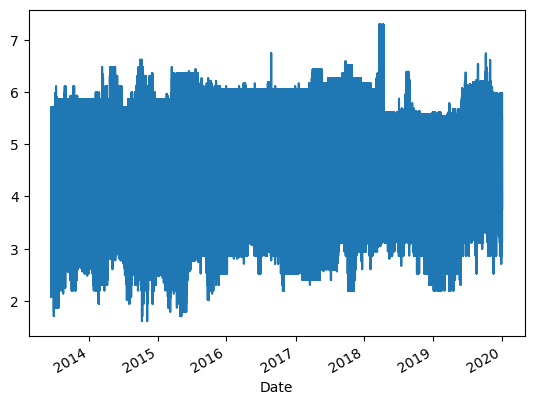

In [26]:
# calculate log
train['adj_log'] = np.log(train['Price'])
train['adj_log'].dropna().plot()

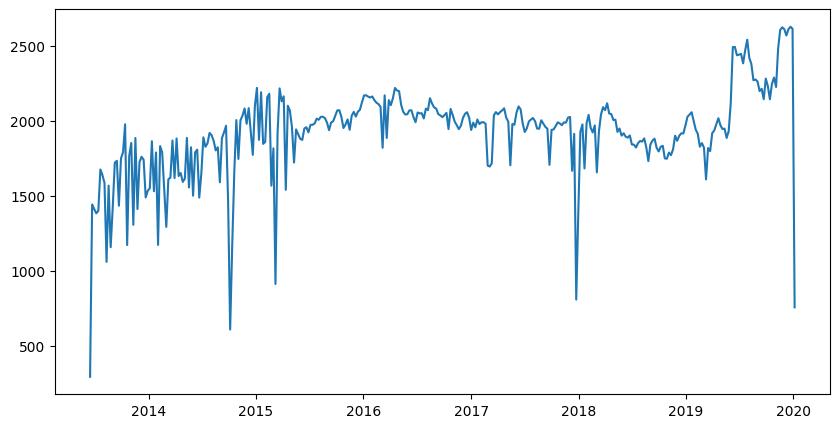

In [27]:
plt.figure(figsize=(10,5))
plt.plot(train['adj_log'].resample('W').sum(),label="Price")
plt.show()

<Axes: xlabel='Date'>

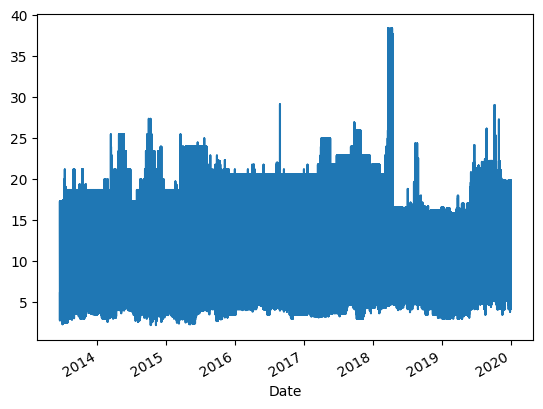

In [28]:

# calculate sqrt
train['adj_sqrt'] = np.sqrt(train['Price'])
train['adj_sqrt'].plot()

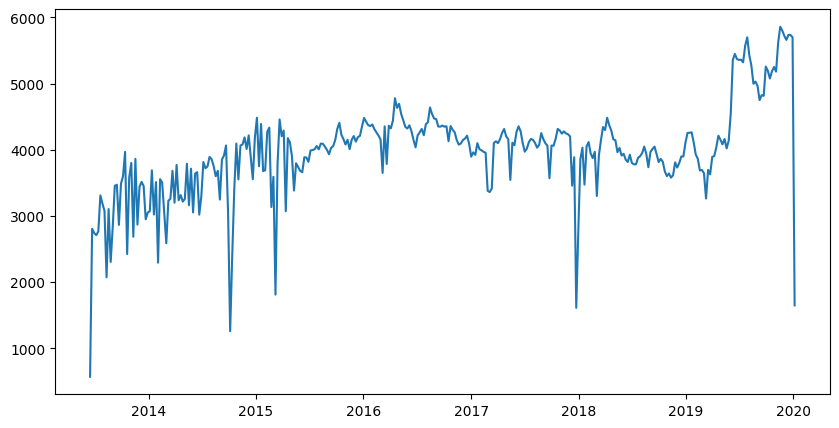

In [29]:

plt.figure(figsize=(10,5))
plt.plot(train['adj_sqrt'].resample('W').sum(),label="sales")
plt.show()

<Axes: xlabel='Date'>

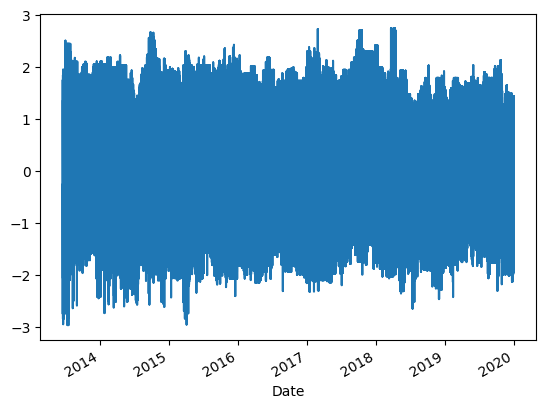

In [30]:
train['price_log_diff1'] = train['adj_log'] - train['adj_log'].shift(1)
train['price_log_diff1'].dropna().plot()

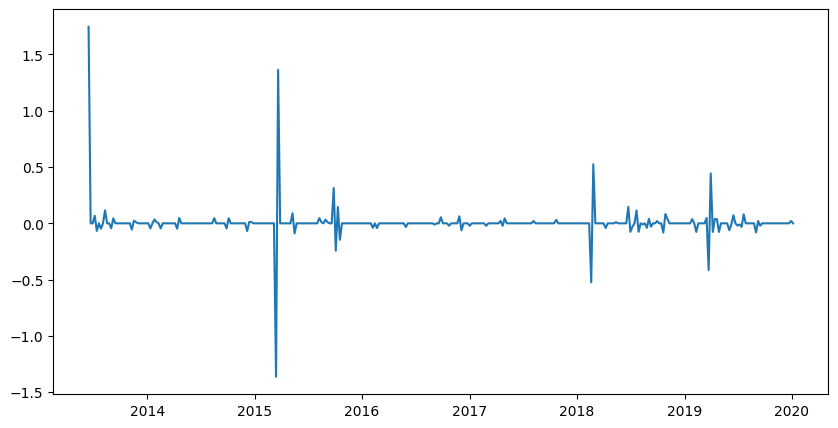

In [31]:
plt.figure(figsize=(10,5))
plt.plot(train['price_log_diff1'].resample('W').sum(),label="Price")
plt.show()

<Axes: xlabel='Date'>

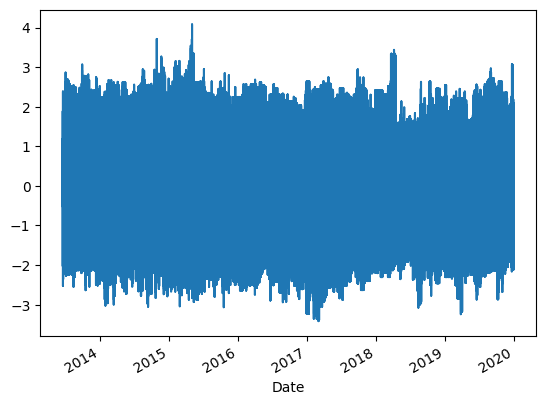

In [32]:
train['price_log_diff'] = train['adj_log'] - train['adj_log'].shift(12)
train['price_log_diff'].dropna().plot()

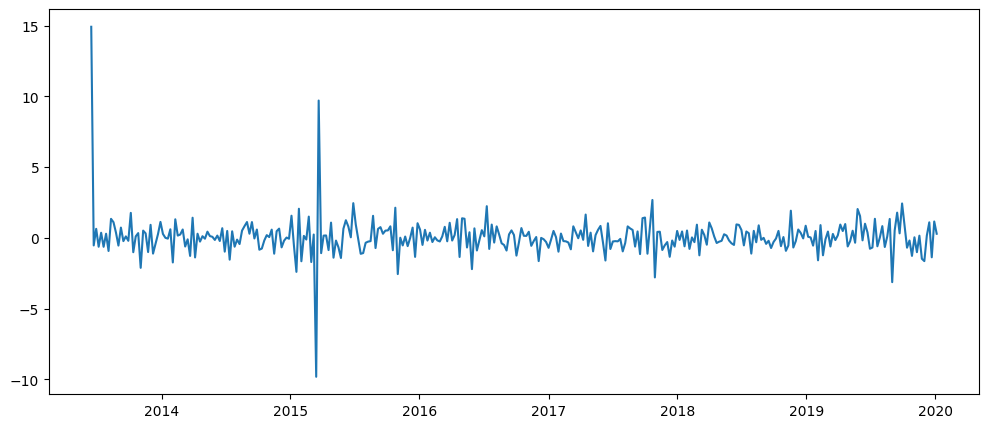

In [33]:
plt.figure(figsize=(12,5))
plt.plot(train['price_log_diff'].resample('W').sum(),label="Price")
plt.show()

In [34]:
print('Number of NaNs in price_log_diff before dropping:', train['price_log_diff'].isna().sum())

Number of NaNs in price_log_diff before dropping: 12


In [35]:
train.dropna(subset=['price_log_diff'], inplace=True)

In [36]:
print('Number of NaNs in price_log_diff after dropping:', train['price_log_diff'].isna().sum())

Number of NaNs in price_log_diff after dropping: 0


In [37]:
stats, p, lags, critical_values = kpss(train['price_log_diff'], 'ct')

C:\Users\User\AppData\Local\Temp\ipykernel_9144\369326687.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stats, p, lags, critical_values = kpss(train['price_log_diff'], 'ct')


In [38]:
print(f'KPSS Statistic: {stats}')
print(f'p-value: {p}')
print(f'num lags: {lags}')
print(f'Critial Values: {critical_values}')

KPSS Statistic: 0.0021666297448051605
p-value: 0.1
num lags: 215
Critial Values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


In [39]:

train

,Price,rolmean,rolstd,Price1,price_diff_12,adj_log,adj_sqrt,price_log_diff1,price_log_diff
Date,,,,,,,,,
2013-06-16,22.5,24.375000,8.464162,1.5,-15.0,3.113515,4.743416,0.068993,-0.510826
2013-06-16,57.5,26.750000,12.778711,35.0,28.5,4.051785,7.582875,0.938270,0.684489
2013-06-16,27.5,27.333333,12.626331,-30.0,7.0,3.314186,5.244044,-0.737599,0.293761
2013-06-16,65.0,31.458333,16.034704,37.5,49.5,4.174387,8.062258,0.860201,1.433547
2013-06-16,15.0,30.291667,16.724313,-50.0,-14.0,2.708050,3.872983,-1.466337,-0.659246
...,...,...,...,...,...,...,...,...,...
2019-12-31,215.0,137.291667,98.468144,0.0,150.0,5.370638,14.662878,0.000000,1.196251
2019-12-31,287.5,149.166667,107.647010,72.5,142.5,5.661223,16.955825,0.290585,0.684489
2019-12-31,222.5,158.125000,109.009617,-65.0,107.5,5.404927,14.916434,-0.256296,0.659995


In [40]:
def monthly_price(data):
    monthly_data = data.copy()
    monthly_data.Date = monthly_data.Date.apply(lambda x: str(x)[:-3])
    monthly_data = monthly_data.groupby('Date')['Price'].sum().reset_index()
    monthly_data.Date = pd.to_datetime(monthly_data.Date)
    return monthly_data


In [41]:
train1 = pd.read_csv('../dataset/processed/train.csv',parse_dates=['Date'])

In [42]:
monthly_df = monthly_price(train1)
monthly_df.head()

,Date,Price
0,2013-06-16,5074.5
1,2013-06-17,4968.5
2,2013-06-18,4925.5
3,2013-06-19,5003.5
4,2013-06-20,5013.0


In [43]:
def time_plot(data, x_col, y_col, title):
    fig, ax = plt.subplots(figsize=(15,5))
    
    # Plot the total price
    sns.lineplot(x=x_col, y=y_col, data=data, ax=ax, color='blue', label='Total Price')
    
    # Calculate the mean price per year and plot it
    second = data.groupby(data.Date.dt.year)[y_col].mean().reset_index()
    second.Date = pd.to_datetime(second.Date, format='%Y')
    mean_dates = second.Date + dt.timedelta(6*365/12)
    
    sns.lineplot(x=mean_dates, y=second[y_col], ax=ax, color='red', label='Mean Price')   
    
    ax.set(xlabel="Date", ylabel="Price", title=title)
    sns.despine()

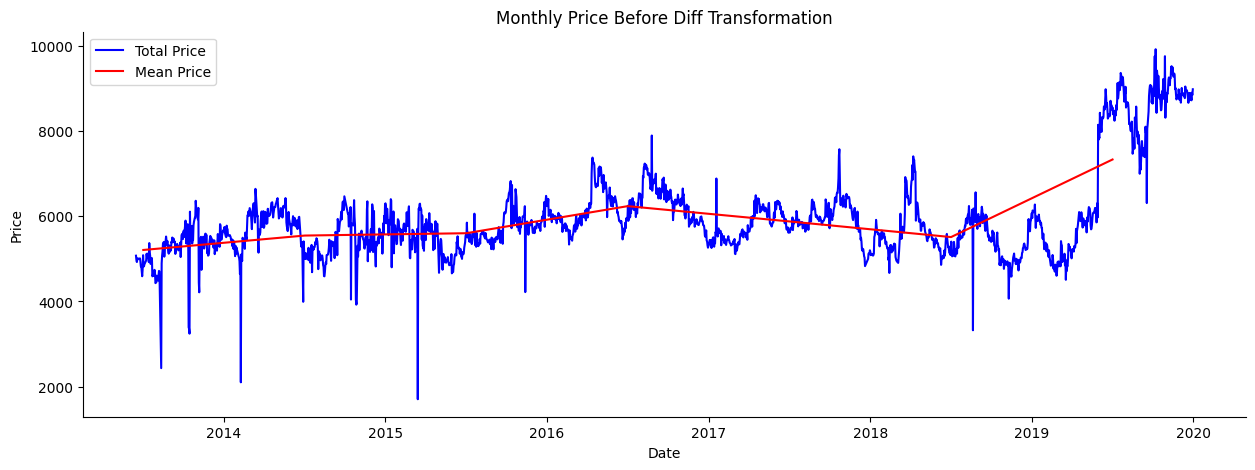

In [44]:
time_plot(monthly_df, 'Date', 'Price', 'Monthly Price Before Diff Transformation')

In [45]:

def get_diff(data):
    data['price_diff'] = data.Price.diff()
    data = data.dropna()
    
    data.to_csv('stationary_df.csv')
    return data

In [46]:

stationary_df = get_diff(monthly_df)

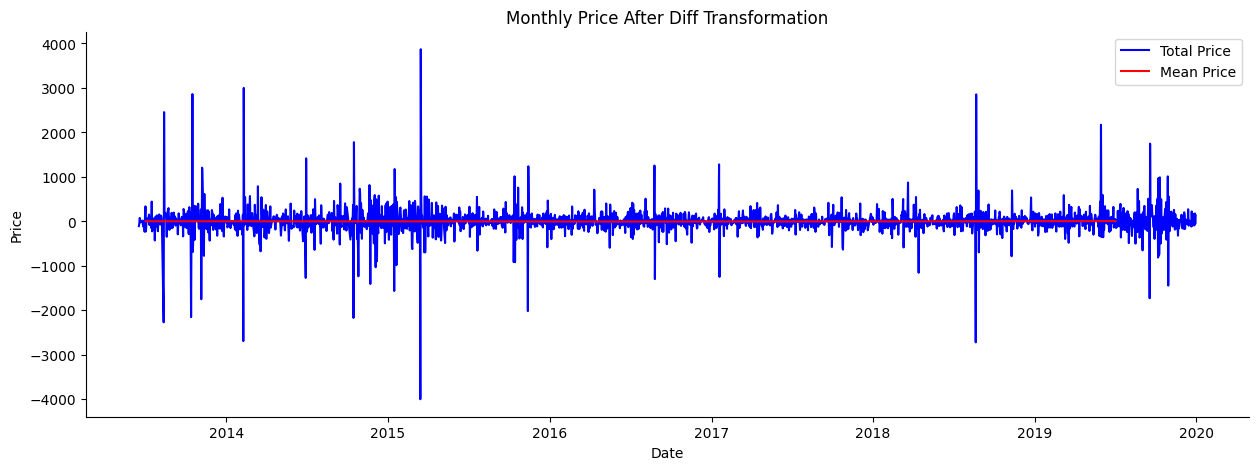

In [47]:
time_plot(stationary_df, 'Date', 'price_diff', 'Monthly Price After Diff Transformation')

In [48]:

stationary_df

,Date,Price,price_diff
1,2013-06-17,4968.5,-106.0
2,2013-06-18,4925.5,-43.0
3,2013-06-19,5003.5,78.0
4,2013-06-20,5013.0,9.5
5,2013-06-21,4993.0,-20.0
...,...,...,...
2259,2019-12-27,8810.5,-22.5
2260,2019-12-28,8720.0,-90.5
2261,2019-12-29,8899.0,179.0
2262,2019-12-30,8844.0,-55.0


In [49]:

# KPSS test for stationarity

In [50]:
stats, p, lags, critical_values = kpss(stationary_df['price_diff'], 'ct')

C:\Users\User\AppData\Local\Temp\ipykernel_9144\2114054814.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stats, p, lags, critical_values = kpss(stationary_df['price_diff'], 'ct')


In [51]:

print(f'KPSS Statistic: {stats}')
print(f'p-value: {p}')
print(f'num lags: {lags}')
print(f'Critial Values: {critical_values}')

KPSS Statistic: 0.04403509130084107
p-value: 0.1
num lags: 61
Critial Values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
